In [1027]:
from skimage.data import coins
import matplotlib.pyplot as plt
from skimage.transform import hough_circle_peaks, hough_circle
from skimage.filters import sobel
import numpy as np
from skimage.morphology import binary_opening, binary_closing, disk
from skimage import color, exposure
from skimage.draw import circle_perimeter 
import cv2
from skimage import io

from math import sin, cos, radians, trunc

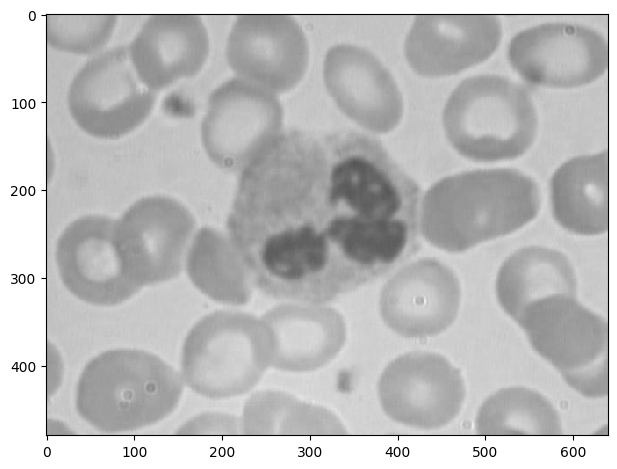

In [1028]:
nome_image = 'BloodImage_00339.jpg'

image_color = io.imread(nome_image)



image_gray =  (color.rgb2gray(image_color)*255).astype('uint8')


red_channel = image_color[:, :, 0]
green_channel = image_color[:, :, 1]



blue_channel = image_color[:, :, 2]

image_gray = green_channel 

# Mostrar os canais individualmente
io.imshow(image_gray)
io.show()

# plt.imshow(image_gray)


# nome_image = 'BloodImage_00339.jpg'
# image_color = io.imread(nome_image)
# image_gray = (color.rgb2gray(image_color) * 255).astype('uint8')

# # Binarizar a imagem
# ret, binary_image = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY)

# # Mostrar a imagem binarizada
# io.imshow(binary_image, cmap='gray')
# io.show()


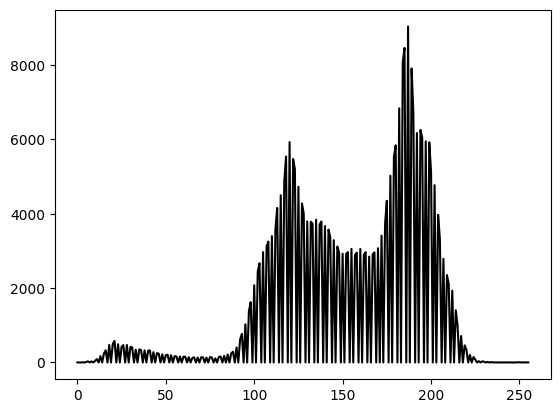

In [1029]:
# image_gray = exposure.equalize_hist(image_gray)

h = np.histogram (image_gray.ravel(),bins=256)
plt.plot (h[0],'-k')

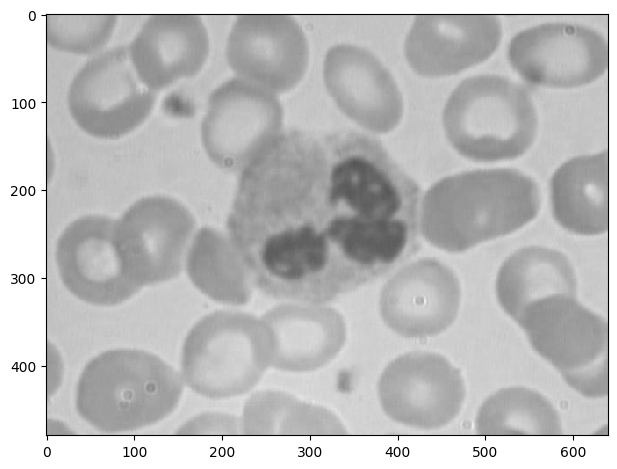

In [1030]:
io.imshow(image_gray)
io.show()

185.9375


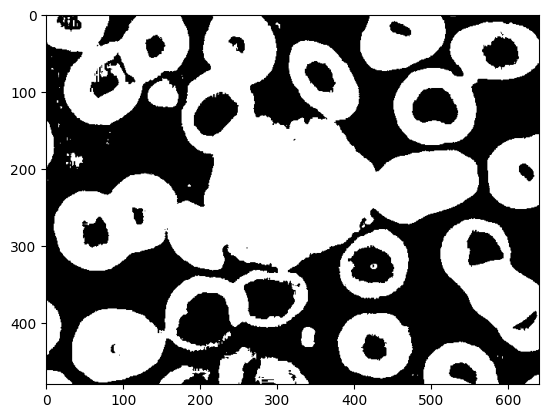

In [1031]:
binary=image_gray.copy()
limiar = image_gray.max()*(200/256)

print(limiar)
binary[binary<=limiar]=0
binary[binary > 0]=1


plt.imshow((255- binary*255),cmap='gray')

[[0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 0 0 1 0 0 0 0]]


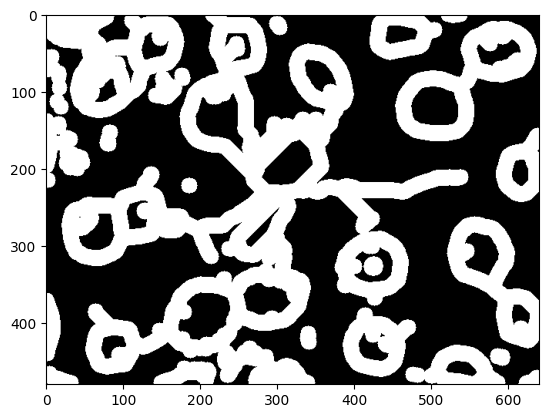

In [1032]:
binary = 255- binary * 255

selem = disk(4)

print(selem)

# binary = binary_opening (binary, selem)
# binary = binary_closing (binary, selem)

from skimage.morphology import skeletonize, dilation

kernel = selem
binary_eroded = cv2.erode(binary.astype(np.uint8), kernel, iterations=1)

thinned_image = skeletonize(binary)

thickness = 4
selem = disk(thickness)
thickened_image = dilation(thinned_image, selem)


plt.imshow ( thickened_image ,cmap='gray')

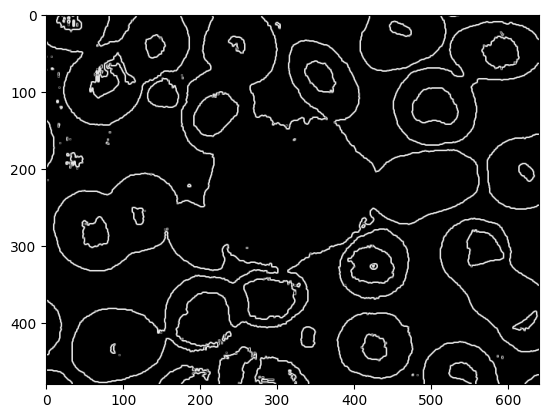

In [1033]:
edges = sobel (binary)
plt.imshow(edges,cmap='gray')